We are working with this astroquery.astrometry_net module! Our goal is to use astrometry.net through python.

https://astroquery.readthedocs.io/en/latest/astrometry_net/astrometry_net.html

In [1]:
from astroquery.astrometry_net import AstrometryNet

In [2]:
AstrometryNet.TIMEOUT = None

In [2]:
import matplotlib
matplotlib.__version__

'3.0.3'

You will need an account with astrometry.net account. As part of your profile, you're given an "API Key", which lets python connect directly to astrometry.net by giving it a string of letters as a "key" to your account. This string of letters is found in your profile section.

http://nova.astrometry.net/api_help

In [3]:
ast = AstrometryNet()
ast.api_key = "vqyvvomrjyjhcuxu"

In [4]:
# !ls ../Data/RRLyrae+EB_Data/Observingtrip1/20160702/RRLy1_000.fits

In [5]:
filename = "../Data/OurRun/0085.rxj0806.3+1527.fits"
filename = "../Data/RRLyrae+EB_Data/Observingtrip1/20160702/RRLy1_001.fits"

!ls $filename

../Data/RRLyrae+EB_Data/Observingtrip1/20160702/RRLy1_001.fits


In [38]:
!open ../Data/RRLyrae+EB_Data/Observingtrip1/20160702/

In [6]:
from astropy.io import fits
f = fits.open(filename)
data = f[0].data
header = f[0].header
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  512 / Axis length                                    
NAXIS2  =                  512 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-07-03T00:49:57' / Date FITS file was generated                  
IRAF-TLM= '2016-07-03T00:50:05' / Time of last modification                     
DATE-OBS= '2016-07-02T05:05:36' / Time at start of exposure                     
UT      = '05:05:36'           / UT time at start of exposure                   
OBSERVAT= 'mro     '           / per the iraf list                              
IMAGETYP= 'object  '        

In [8]:
settings = {
    "scale_units" : "arcsecperpix",
    "scale_type" : 'ul',
    "scale_lower" : 0.6,
    "scale_upper" : 0.7,
}

In [7]:
from photutils import DAOStarFinder
from astropy.stats import mad_std

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
bkg_sigma = mad_std(data)
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)
sources = daofind(data-np.median(data))

In [47]:
bkg_sigma

133.4341996655042

In [48]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,244.65090727459383,43.933186853959576,0.4656232456045941,0.2609620245602856,0.8614824007094459,25,0.0,424.0,1.1240868349268096,-0.1269996536895946
2,487.41181300306437,51.627541466750536,0.3171240726732979,-0.7649449995757877,0.10558239568415441,25,0.0,587.0,1.4761237967311889,-0.4228069539863099
3,498.98818311064616,78.60337388476773,0.30749095709363655,-0.707244229845879,0.08602904793212546,25,0.0,93.0,1.032798974903451,-0.035039495507461826
4,396.7345418424456,94.30155277645208,0.5829680010357893,-0.6275232307538013,-0.3207262889380091,25,0.0,188.0,1.1031160948706387,-0.10655305287851079
5,315.12132746401073,132.22118001179714,0.4187545870555545,0.08792179401334536,-0.18430162750874327,25,0.0,143.0,1.1173611361429452,-0.12048390433280229
6,69.74172143030292,139.06796303073457,0.44224707031107463,-0.03313117449321088,0.2771839875377148,25,0.0,689.0,1.4337715000604956,-0.3911998585071803
7,72.01304468993514,138.40571762085904,0.4648967656908209,0.1261376350645445,-0.3621911410182053,25,0.0,526.0,1.026050125998342,-0.027921445099132886
8,42.19433753527301,172.6144883223703,0.5508827188052235,-0.5980885429541248,-0.16128613268286623,25,0.0,1225.0,2.1058087948666775,-0.8085473379402175
9,210.85177128057916,191.8045838864063,0.25554330267865877,0.30671043168605494,-0.6174386926986879,25,0.0,71.0,1.0083714116580935,-0.009051311235895062


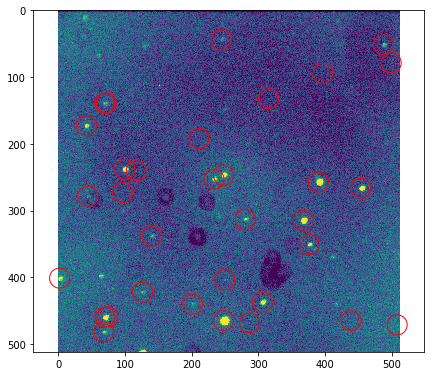

In [49]:
plt.figure(figsize=(7,7))
mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

plt.imshow(data, vmin=median-1*sigma, vmax=median+3*sigma); #[:200,:200]

plt.scatter(sources['xcentroid'], sources['ycentroid'], s=400, marker='o', facecolors='none', edgecolors='r');

In [50]:
ast.solve_from_image?

In [34]:
data.shape

(512, 512)

In [35]:
ast.solve_from_source_list?

In [40]:
image_width = 512
image_height = 512
wcs_header = ast.solve_from_source_list(sources['xcentroid'], sources['ycentroid'],
                                        image_width, image_height,
                                        solve_timeout=120*3)#, **settings)

Solving................................................................

In [51]:
wcs_header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        287.129816375 / RA  of reference point                         
CRVAL2  =        38.8190935405 / DEC of reference point                         
CRPIX1  =        198.4911467

In [37]:
image_width = 512
image_height = 512
wcs_header = ast.solve_from_source_list( sources['ycentroid'], sources['xcentroid'],
                                        image_width, image_height,
                                        solve_timeout=120*3)#, **settings)

Solving......................

KeyboardInterrupt: 

In [ ]:
wcs_header

In [21]:
AstrometryNet.show_allowed_settings()

allow_commercial_use: type 'str', default value d, allowed values ('d', 'y', 'n')
allow_modifications: type 'str', default value d, allowed values ('d', 'y', 'n')
center_dec: type 'float', default value None, allowed values (-90, 90)
center_ra: type 'float', default value None, allowed values (0, 360)
crpix_center: type 'bool', default value None, allowed values ()
downsample_factor: type 'int', default value None, allowed values (1,)
parity: type 'int', default value None, allowed values (0, 2)
positional_error: type 'float', default value None, allowed values (0,)
publicly_visible: type 'str', default value y, allowed values ('y', 'n')
radius: type 'float', default value None, allowed values (0,)
scale_err: type 'float', default value None, allowed values (0, 100)
scale_est: type 'float', default value None, allowed values (0,)
scale_lower: type 'float', default value None, allowed values (0,)
scale_type: type 'str', default value None, allowed values ('ev', 'ul')
scale_units: type '

In [7]:
# wcs_header = ast.solve_from_image(filename, settings) #ra_key="RA", dec_key="DEC")

In [22]:
wcs_header = ast.solve_from_image(filename)

Determining background stats
Finding sources
Found 13 sources


a floating-point value was expected. [astropy.wcs.wcs]


 id     xcentroid      ...        flux                 mag         
--- ------------------ ... ------------------ ---------------------
 13 247.56439370902368 ... 27.420675539086396   -3.5951953747919765
  6  389.8557249022774 ...  8.262412589501343   -2.2927671949715998
  8  367.0807660650801 ...  4.730479808737843   -1.6872629827742522
 11  305.8815228918842 ...   2.69772485165723   -1.0774941317787476
  3  99.80285747261368 ... 2.3657063278571946   -0.9349020788500007
  7 454.04933720615463 ... 2.3026802907786723    -0.905584109360026
  4 247.60447125267547 ...  2.262524266222998   -0.8864831145883832
 12  70.08024038936152 ...  2.217559675677127   -0.8646882893750352
  1 151.01244132325306 ...  1.803901779831835    -0.640532217662368
  9  376.2799620160378 ... 1.7043804667098372   -0.5789163706610673
 10 2.0186687571851785 ... 1.2979469750593489   -0.2831423765585816
  5 233.09376141820525 ... 1.0975883630681345  -0.10109873469567036
  2  42.13371319861676 ... 1.0147124382567563 -0

It returns a header with the world coordinate system (WCS) parameters added to the frame. The WCS will match the first data it finds, in this case the 1st corner of our total image because our image is split in 4.

In [9]:
wcs_header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        121.394030076 / RA  of reference point                         
CRVAL2  =        15.4130651675 / DEC of reference point                         
CRPIX1  =        584.0153452

In [82]:
wcs_header

{}

In [10]:
type(wcs_header)
wcs_header['NAXIS']=2
wcs_header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    2 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        121.394030076 / RA  of reference point                         
CRVAL2  =        15.4130651675 / DEC of reference point                         
CRPIX1  =        584.0153452

KeyError: 'CRVAL1'

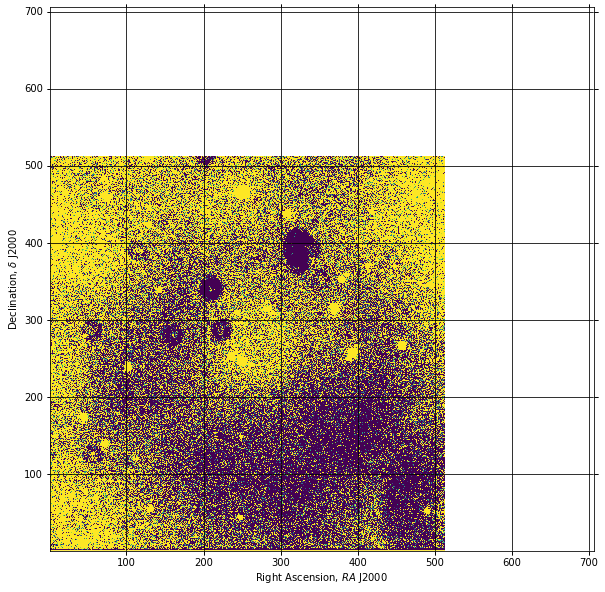

In [107]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
from astropy import wcs

f = fits.open(filename)
data = f[0].data
header = wcs_header #f[0].header

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

w = wcs.WCS(header)

#PLOT SETUP
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=w)
# ax.set_autoscale_on(True)
fig.set_size_inches(10,10)
# fig.set_size_inches(4,4)

width_pix = 705
height_pix = 705
ax.set_xlim(0,width_pix);
ax.set_ylim(0,height_pix);
# ax.invert_yaxis()
# ax.invert_xaxis()
# ax.set_title('DIS Observations Slit and SN Locations, RA vs. DEC')
ax.set_xlabel('Right Ascension, $RA$ J2000')
ax.set_ylabel('Declination, $\delta$ J2000')
ax.grid(color='black')

ax.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma);

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import astroquery
import astropy.units as u

# here we are pulling the center of the image from the header
coord = SkyCoord(ra=header['CRVAL1'], dec=header['CRVAL2'],
                 unit=(u.degree, u.degree), frame='icrs')

# and we query gaia data for 10 arcmin around.
r = Gaia.query_object_async(coordinate=coord, radius= 10 * u.arcmin)

# the result is a whole bunch of ra and dec
radec = np.array( [r["ra"], r["dec"]] ).T
# we turn those into pixel values with the following:
pixels = w.wcs_world2pix(radec, 1)

# which we finally plot as follows:
plt.scatter(pixels.T[0], pixels.T[1], s=400, marker='o', facecolors='none', edgecolors='r');